In [1]:
from qiskit import *
vector_sim = Aer.get_backend('statevector_simulator')

In [2]:

IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider=IBMQ.get_provider()

In [3]:
from qiskit.tools.visualization import plot_histogram

In [4]:
circuit = QuantumCircuit(2,2)

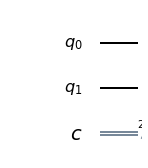

In [5]:
circuit.draw(output='mpl')

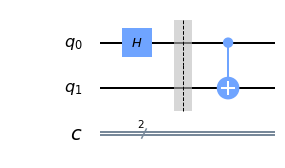

In [6]:
circuit.h(0)
circuit.barrier()
circuit.cx(0,1)
circuit.draw(output='mpl')

In [8]:
circuit.barrier()
result = execute(circuit, vector_sim).result().get_statevector()
for i in result:
    print(i)


(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


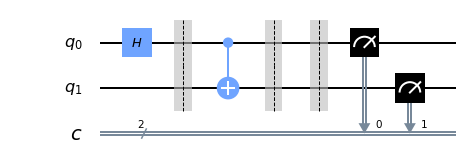

In [9]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [10]:
counts = execute(circuit, Aer.get_backend('qasm_simulator')).result().get_counts()

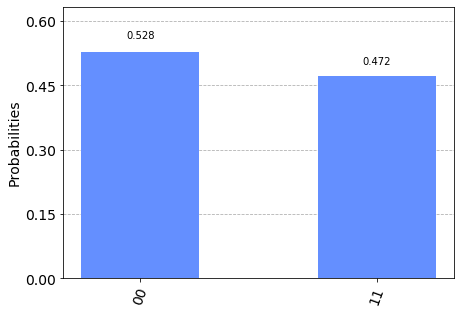

In [11]:
plot_histogram(counts)

In [12]:
print(counts)

{'11': 483, '00': 541}


In [14]:
from qiskit.tools.monitor import job_monitor

In [19]:
job = execute(circuit, provider.get_backend('ibmq_burlington'))

In [20]:
job_monitor(job)

Job Status: job has successfully run


In [21]:
result = job.result().get_counts()

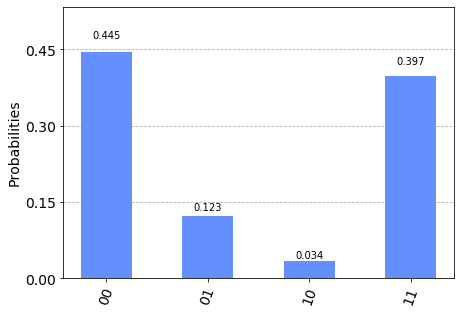

In [22]:
plot_histogram(result)

In [13]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.3'}